In [1]:
import networkx as nx
import random as ra
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
def generate_random_graph(n , m):
    all_edges_possible = int(n*(n-1)/2)
    g = nx.Graph()
    if m > all_edges_possible:
        print("number of edges is not possible!")
        return g
    for i in range(n):
        g.add_node(i)
    all_edges = list(range(n**2))
    while True:
        if g.number_of_edges() == m:
            return g
        x = ra.sample(all_edges,1)
        all_edges.remove(x[0])
        i = x[0]//(n)
        j = x[0]%(n)
        if i == j:
            continue
        g.add_edge(i,j)

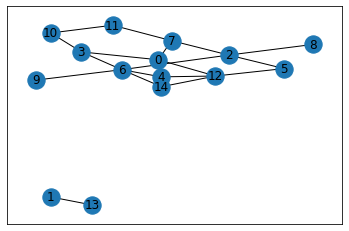

In [3]:
g = generate_random_graph(15,20)
nx.draw_networkx(g)

In [4]:
g.degree()

DegreeView({0: 4, 1: 1, 2: 4, 3: 3, 4: 4, 5: 2, 6: 5, 7: 3, 8: 1, 9: 1, 10: 2, 11: 2, 12: 4, 13: 1, 14: 3})

In [5]:
sum(sorted(d for n, d in g.degree()))

40

In [6]:
def avg_edge_net(iterate ,  n ,  p):
    summ = 0
    bigNum = list()
    avg_of_degrees = list()
    variance_of_degrees = list()
    for i in range (iterate):
        g = nx.erdos_renyi_graph(n,p)
        degrees = list(d for n, d in g.degree())
        sum_of_this_iter = sum(degrees)
        avg_of_degrees.append(sum_of_this_iter/n)
        variance_of_degrees.append(np.var(degrees))
        summ = summ + (sum_of_this_iter/2)
        bigNum.append(summ/(i+1))
    return bigNum,avg_of_degrees,variance_of_degrees

average of degrees : 4.476000000000001
variance of degrees : 1.8111199999999978


Text(0, 0.5, 'E(k)')

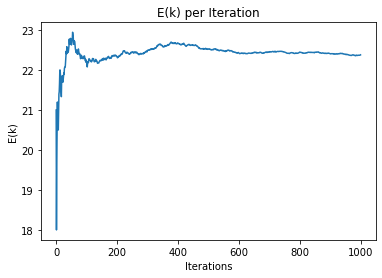

In [7]:
iterate = 1000
bigNum,avg_of_degrees,variance_of_degrees = avg_edge_net(iterate, 10 , 0.5)
plt.plot(bigNum)
print("average of degrees : {}".format(sum(avg_of_degrees)/iterate))
print("variance of degrees : {}".format(sum(variance_of_degrees)/iterate))
plt.title('E(k) per Iteration')
plt.xlabel('Iterations')
plt.ylabel('E(k)')

we know that in an independant senario the exepectation is sum of each one so the expectation value is np, which n is number of edges in n-node complete graph

اینجا مال توزیع درجه ها ، پوواسون و نرمال و نشون دادن چولگی با سه تا نمودار بعدیشه.

In [8]:
def degree_dist(g):
    degrees = list(d for n, d in g.degree())
    dd = Counter(degrees)
#     print(dd);
    for key in dd:
#         print(dd[key])
        dd[key] = dd[key]/n
    return dd

In [9]:
def degree_dist_LLN(iterate,n,p):
    counter = Counter(); 
    for i in range(iterate):
        g = nx.erdos_renyi_graph(n,p)
        counter = counter + degree_dist(g)
    for key in counter:
        counter[key] = counter[key]/iterate
    return counter

In [10]:
iterate = 100
n = 500
c = degree_dist_LLN(iterate,n,0.5)

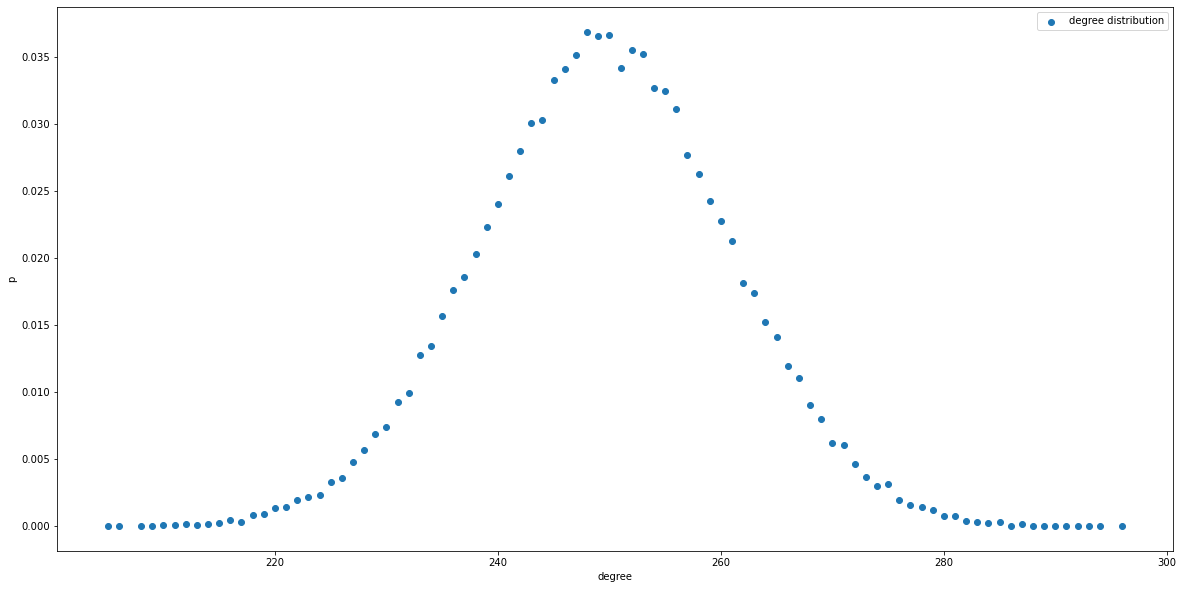

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(c.keys(),c.values(),label='degree distribution')
plt.xlabel("degree")
plt.ylabel("p")
plt.legend(loc='best')
plt.show()


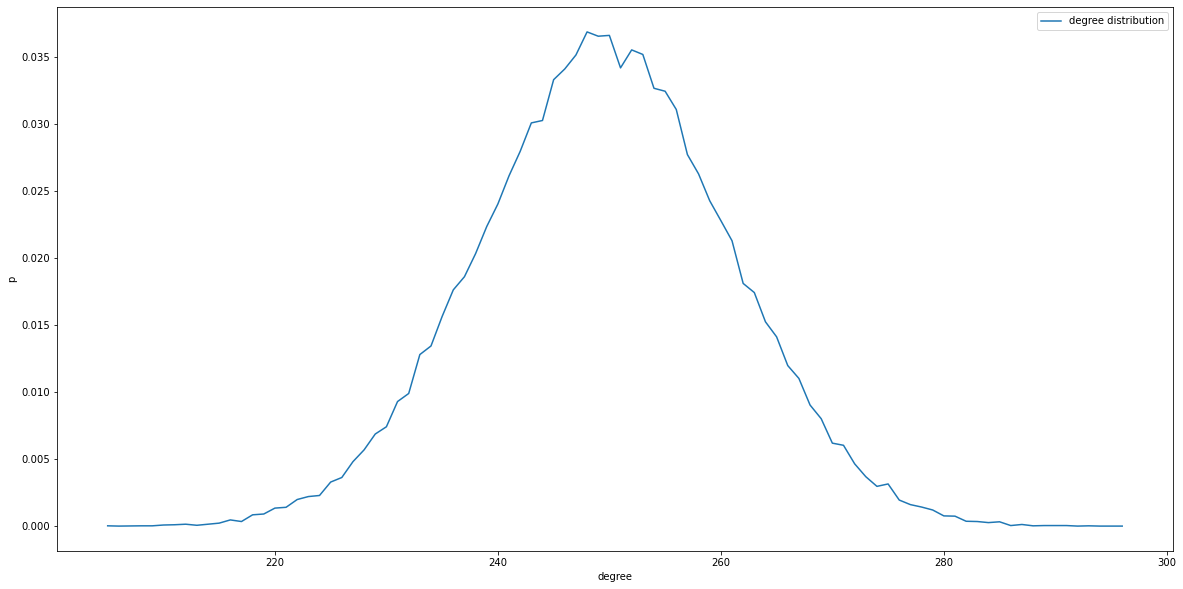

In [12]:
c_1 = sorted(c.items())
X, Y = map(list, zip(*c_1))
plt.figure(figsize=(20,10))
plt.plot(X,Y,label='degree distribution')
plt.xlabel("degree")
plt.ylabel("p")
plt.legend(loc='best')
plt.show()

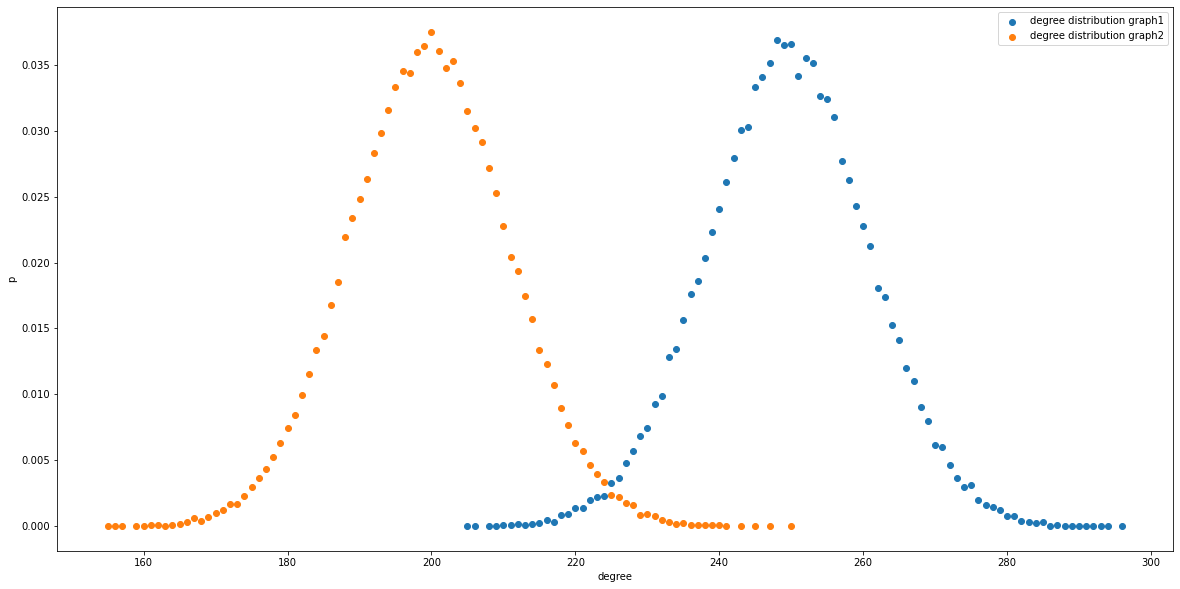

In [13]:

C = degree_dist_LLN(iterate,n,0.4)
plt.figure(figsize=(20,10))
plt.scatter(c.keys(),c.values(),label='degree distribution graph1')
plt.scatter(C.keys(),C.values(),label='degree distribution graph2')
plt.xlabel("degree")
plt.ylabel("p")
plt.legend(loc='best')
plt.show()

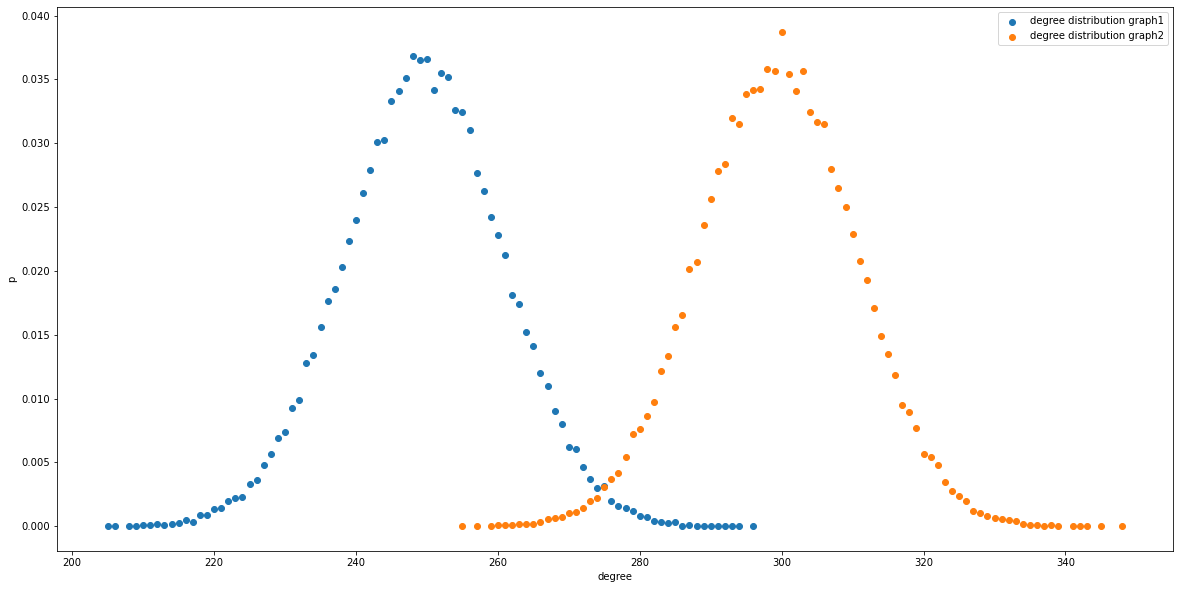

In [14]:

C = degree_dist_LLN(iterate,n,0.6)
plt.figure(figsize=(20,10))
plt.scatter(c.keys(),c.values(),label='degree distribution graph1')
plt.scatter(C.keys(),C.values(),label='degree distribution graph2')
plt.xlabel("degree")
plt.ylabel("p")
plt.legend(loc='best')
plt.show()

In [15]:
k = 70
n_fact = np.sqrt(np.pi * 2 * k) * ((k/np.e)**k)
n_fact

1.1964320047337557e+100

In [16]:
def pois(k , avg):
    return np.exp(-avg)/(np.sqrt(2*np.pi*k))*((avg*np.e)/k)**k

همانطور که در پایین دیده میشود به سرعت به صفر نزدیک میشود و هرچه مقادیر کا بیشتر میشود سریع تر به صفر نزدیک میشود و اصطلاحا دم نازک است. 

C:\Users\mhars\AppData\Local\Temp/ipykernel_16248/2783104582.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-avg)/(np.sqrt(2*np.pi*k))*((avg*np.e)/k)**k


Text(0, 0.5, 'p')

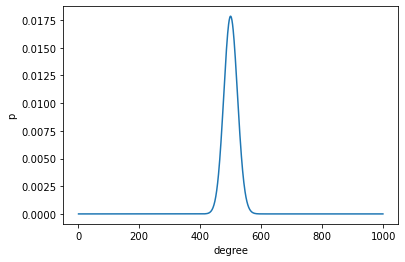

In [17]:
k = np.arange(1000)
plt.plot(pois(k,500),label='poison distribution')
plt.xlabel("degree")
plt.ylabel("p")

In [18]:
def generate_graph(n):
    all_edges_possible = int(n*(n-1)/2)
    g = nx.Graph()
    for i in range(n):
        g.add_node(i)
    li = list(range(int(n**2)))
    connected = 99999999999999
    p = list()
    while True:
        if g.number_of_edges() == all_edges_possible:
            return p , connected
        h = list(nx.connected_components(g))
        for i in range(len(h)):
              h[i] = len(h[i])
            
        p.append(np.max(h))
        if np.max(h) == n:
            connected = min (int(n**2) - len(li) , connected)
        
        x = ra.sample(li,1)    
        li.remove(x[0])
        i = x[0]//(n)
        j = x[0]%(n)
        if i == j:
            continue
        g.add_edge(i,j)

206


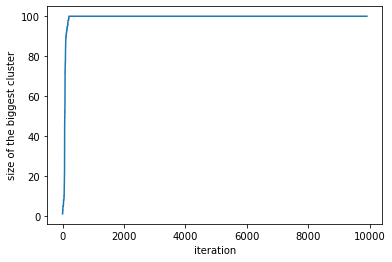

In [19]:
lis , co = generate_graph(100)
plt.plot(lis)
plt.xlabel("iteration")
plt.ylabel("size of the biggest cluster")
print(co)

In [20]:
def check_log(iterate ,n, p):
    number_of_connnected = 0
    for i in range(iterate):
        g = nx.erdos_renyi_graph(n,p)
        if nx.is_connected(g):
            number_of_connnected = number_of_connnected+1 
    return number_of_connnected/iterate        

In [21]:
li = dict()
n = 100
iterate = 20
for i in np.arange(0,0.5,0.01):
    li[i] = (check_log(iterate ,n, i))

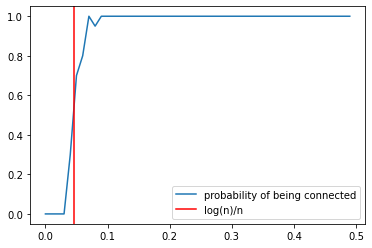

0.04605170185988092


In [34]:
plt.plot(li.keys(),li.values(),label='probability of being connected')
plt.axvline(np.log(n)/n,label='log(n)/n',color='red')
plt.legend()
plt.show()
print(np.log(n)/n)

خواسته 2 دوم 


In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [24]:
def pi(degree , beta , n):
    t = (degree+1)*beta
    t = t/n
    return sigmoid(t)

In [25]:
def degree_dist(g):
    degrees = list(d for n, d in g.degree())
    dd = Counter(degrees)
#     print(dd);
    for key in dd:
#         print(dd[key])
        dd[key] = dd[key]/n
    return dd

In [26]:
def fitness_model(g , n):
    beta = np.random.normal(size=n)
    for k in range(n**2):
        edges = list(g.edges)
        edgeIndex = ra.randint(0 , len(edges)-1)
        i = edges[edgeIndex][0]
        j = edges[edgeIndex][1]
        while g.degree(i) == n-1: 
            edgeIndex = ra.randint(0 , len(edges)-1)
            i = edges[edgeIndex][0]
            j = edges[edgeIndex][1]
        m = i
        while i == m or (m in g.adj[i]):
            m = ra.randint(0 , n-1)
#             print(m)
        p = ra.uniform(0 , 1)
        if(p < pi(g.degree(m) , beta[m] , n)):
            g.remove_edge(i , j)
            g.add_edge(i,m)   
    return g        

In [27]:
def degree_dist_LLN(iterate,n,m):
    counter = Counter()
    for i in range(iterate):
        g = generate_random_graph(n , m)
        g = fitness_model(g,n)
        counter = counter + degree_dist(g)
#         print(i)
    for key in counter:
        counter[key] = counter[key]/iterate
    return counter

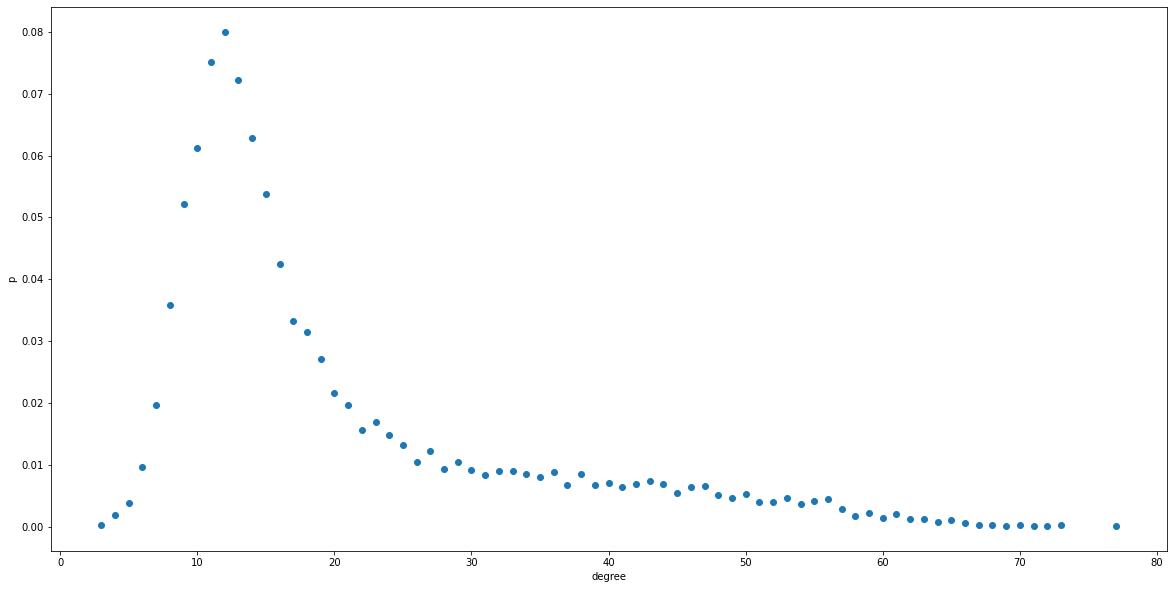

In [29]:
n = 100
m = 1000
c = degree_dist_LLN(100,n , m)
plt.figure(figsize=(20,10))
plt.scatter(c.keys(),c.values(),label='degree distribution')
plt.xlabel("degree")
plt.ylabel("p")
plt.show()

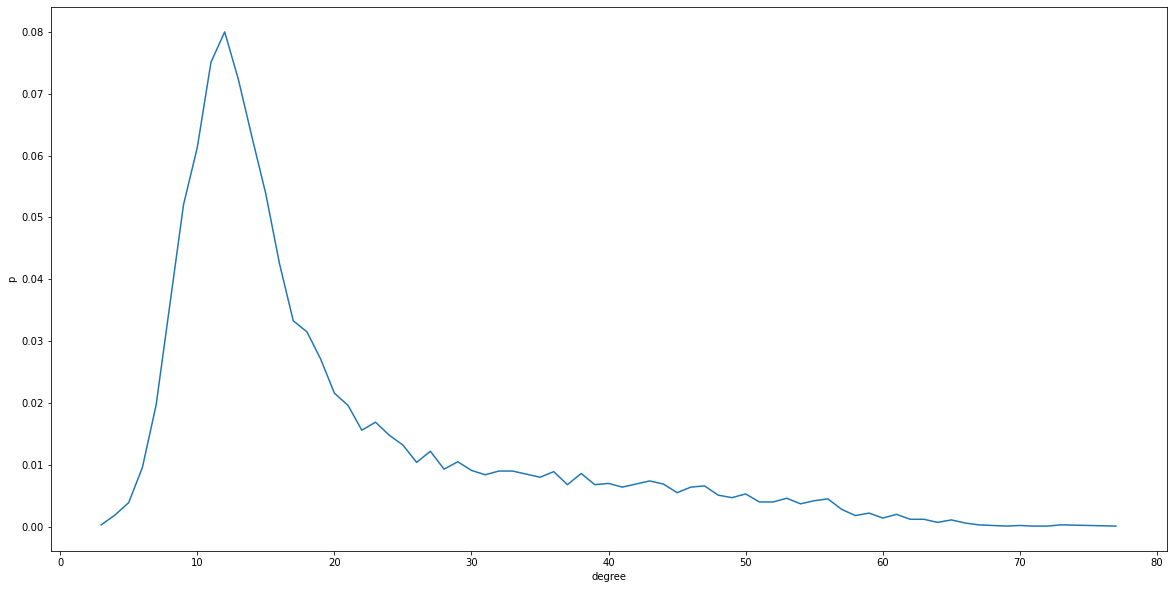

In [30]:
c = sorted(c.items())
X, Y = map(list, zip(*c))
plt.figure(figsize=(20,10))
plt.plot(X,Y,label='degree distribution')
plt.xlabel("degree")
plt.ylabel("p")
plt.show()